In [1]:
import os
import numpy as np
import sys
import pandas as pd
# root_folder = os.path.dirname(os.getcwd())
# sys.path.append(root_folder)
import utilities as rocku
import skimage as ski
import matplotlib.pyplot as plt

In [2]:
###################### need to change start
ipts="26647"
###################### need to change end
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce"
scan_list = os.listdir(scan_loc)
sorted(scan_list, reverse=True)

['2023_08_07_monalisa',
 '2023_06_17_weld_high_res_nGI_redo',
 '2023_06_16_weld_high_res_nGI_redo',
 '2023_06_16_highres_absorption_grating_exam',
 '2023_06_16_far_near_redo',
 '2023_06_16_far_near',
 '2023_06_15_weld',
 '2023_06_14_pores_in_polymer',
 '2023_06_14_graphite_thin_redo1',
 '2023_06_14_graphite_thin_redo',
 '2023_06_14_graphite_thin',
 '2023_06_14_AMed_samples',
 '2023_06_12_highres_nGI',
 '2023_06_12_gratings_exam_high_res',
 '2023_06_12_absorption_grating_exam_high_res',
 '2023_06_12_Cu_foils',
 '2023_05_30_battery_parts1',
 '2023_05_30_battery_disks_redo',
 '2023_05_30_battery_disks',
 '2023_05_29_battery_parts2',
 '2023_05_28_battery2_Han',
 '2023_05_28_battery1_Han',
 '2023_05_28_Zr4',
 '2023_05_27_OB',
 '2023_05_26_salt',
 '2023_05_26_monalisa_DOE_small',
 '2023_05_26_monalisa_DOE',
 '2023_05_26_battery2',
 '2023_05_26_battery1',
 '2023_05_25_test',
 '2023_05_25_monalisa_DOE_redo',
 '2023_05_25_monalisa_DOE',
 '2022_05_04_stability_pump',
 '2022_05_04_samples3',
 '20

In [3]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
# ob_loc = "/HFIR/CG1D/IPTS-" + ipts + "/raw/ob"
os.listdir(ob_loc)

['2023_06_16_far_near_redo',
 '2023_06_17_weld_high_res_nGI_redo',
 '2023_06_14_pores_in_polymer',
 '2023_06_12_Cu_foils',
 '2022_04_27_electrodes_Nelson',
 '2023_06_16_weld_high_res_nGI_redo',
 '2022_05_04_samples2',
 '2021_05_29_OB_stepping',
 '2023_05_28_Zr4',
 '2022_05_02_Ti64_AM_DOE',
 '2023_05_30_battery_disks_redo',
 '2022_04_28_Monolisa_angles',
 '2022_04_22_Monalisa_G0',
 '2023_05_26_salt',
 '2023_05_26_battery2',
 '2023_06_12_highres_nGI',
 '2022_04_23_Monalisa_G1_loop_backlash_400nm',
 '2022_04_15_stability',
 '2023_05_30_battery_disks',
 '2022_05_03_stability_pump',
 '2023_05_25_monalisa_DOE',
 '2022_04_26_Ti64_stepping',
 '2023_06_14_graphite_thin_redo1',
 '2023_06_15_weld',
 '2022_04_23_Monalisa_G1_loop_backlash',
 '2022_04_23_Monalisa_G1_loop',
 '2022_04_29_metals',
 '2023_05_26_battery1',
 '2023_06_14_graphite_thin_redo',
 '2023_08_07_monalisa',
 '2022_04_26_quartz',
 '2023_06_12_gratings_exam_high_res',
 '2023_06_14_AMed_samples',
 '2022_04_16_stability_brick_on',
 '20

In [4]:
dc_loc = "/HFIR/CG1D/IPTS-" + ipts + "/raw/dc"
os.listdir(dc_loc)

['2023_05_24',
 '2023_07_27_90s',
 '2023_06_09_high_res',
 '2023_06_16_20s',
 '2023_06_16_weld_highres_nGI']

In [18]:
scan_name = "2023_08_07_monalisa"
dc_name = "2023_07_27_90s"
ob_name = "2023_08_07_monalisa"
#########################################
images_per_step = 1
out_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data"
xl_save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/notes_photos/"+scan_name+"_table.xlsx"
#########################################
if ob_name == scan_name:
    ob_name = None
scan_dir = os.path.join(scan_loc, scan_name)
out_dir = os.path.join(out_loc, scan_name)
file_list = os.listdir(scan_dir)
file_list = sorted(file_list, reverse=False)
dc_dir = os.path.join(dc_loc, dc_name)
dc_list = os.listdir(dc_dir)
dc_list = sorted(dc_list, reverse=False)
if ob_name is None:
    ob_dir = scan_dir
else:
    ob_dir = os.path.join(ob_loc, ob_name)
    ob_list = os.listdir(ob_dir)
    ob_list = sorted(ob_list, reverse=False)

In [20]:
# file_list.pop(0)
# file_list.remove('20230527_ACL07_141_0030_0030.tiff')
# file_list.remove('20230527_ACL07_141_0030_0031.tiff')
# file_list.remove('20230527_ACL07_141_0030_0032.tiff')
# file_list.remove('20230527_ACL07_141_0030_0033.tiff')
# file_list.remove('20230527_ACL07_141_0030_0034.tiff')
# file_list.remove('20230527_ACL07_141_0030_0035.tiff')
# file_list.remove('20230527_ACL07_141_0030_0036.tiff')

# file_list.remove('20230530_open_0030_0036.tiff')

# file_list.remove('20230531_ACL_096_0030_0026.tiff')
# file_list.remove('20230531_ACL_096_0030_0027.tiff')
# file_list.remove('20230531_ACL_096_0030_0028.tiff')
# file_list.remove('20230531_ACL_096_0030_0029.tiff')
# file_list.remove('20230531_ACL_096_0030_0030.tiff')
# file_list.remove('20230531_ACL_096_0030_0031.tiff')
# file_list.remove('20230615_ACL_192_0090_0001.tiff')
# file_list.remove('20230615_ACL_192_0090_0002.tiff')
# file_list.remove('20230806_ACL_185_0090_0009.tiff')
# file_list.remove('20230806_ACL_185_0090_0010.tiff')
# file_list.remove('20230806_ACL_185_0090_0011.tiff')
# file_list.remove('20230806_ACL_185_0090_0012.tiff')

# file_list.remove('20230727_ACL_087_0090_0001.tiff')
# file_list.remove('20230727_ACL_087_0090_0002.tiff')
file_list.remove('20230807_ACL_055_0090_0001.tiff')
file_list.remove('20230807_ACL_055_0090_0002.tiff')
file_list.remove('20230807_ACL_055_0090_0003.tiff')
file_list.remove('20230807_ACL_055_0090_0004.tiff')
file_list.remove('20230807_ACL_055_0090_0005.tiff')


file_list

['20230807_ACL_060_0090_0001.tiff',
 '20230807_ACL_060_0090_0002.tiff',
 '20230807_ACL_060_0090_0003.tiff',
 '20230807_ACL_060_0090_0004.tiff',
 '20230807_ACL_060_0090_0005.tiff',
 '20230807_ACL_060_0090_0006.tiff',
 '20230807_ACL_060_0090_0007.tiff',
 '20230807_ACL_060_0090_0008.tiff',
 '20230807_ACL_060_0090_0009.tiff',
 '20230807_ACL_060_0090_0010.tiff',
 '20230807_ACL_060_0090_0011.tiff',
 '20230807_ACL_060_0090_0012.tiff',
 '20230807_ACL_065_0090_0001.tiff',
 '20230807_ACL_065_0090_0002.tiff',
 '20230807_ACL_065_0090_0003.tiff',
 '20230807_ACL_065_0090_0004.tiff',
 '20230807_ACL_065_0090_0005.tiff',
 '20230807_ACL_065_0090_0006.tiff',
 '20230807_ACL_065_0090_0007.tiff',
 '20230807_ACL_065_0090_0008.tiff',
 '20230807_ACL_065_0090_0009.tiff',
 '20230807_ACL_065_0090_0010.tiff',
 '20230807_ACL_065_0090_0011.tiff',
 '20230807_ACL_065_0090_0012.tiff',
 '20230807_ACL_070_0090_0001.tiff',
 '20230807_ACL_070_0090_0002.tiff',
 '20230807_ACL_070_0090_0003.tiff',
 '20230807_ACL_070_0090_0004

In [21]:
len(file_list)

492

In [22]:
idx_list = []
pos_list = []
ob_first_idx = None
ob_last_idx = None
for ea in file_list:
    _split = ea.split('_')
    _str = _split[-1]
    _pos = _split[2]
    _idx = _str.split('.')[0]
    idx_list.append(int(_idx))
    pos_list.append(int(_pos))
num_of_img = max(idx_list)
pos1 = max(pos_list)
pos2 = min(pos_list)
pos1_str = 'ACL_' + "{:03d}".format(pos1)
pos2_str = 'ACL_' + "{:03d}".format(pos2)
idx_str = '_' + "{:04d}".format(1)
pos_file_list = []
for e in file_list:
    if pos1_str in e or pos2_str in e:
        if idx_str in e:
            pos_file_list.append(e)
pos_file_list

['20230807_ACL_195_0090_0001.tiff', '20230808_ACL_002_0090_0001.tiff']

Text(0.5, 1.0, 'last image')

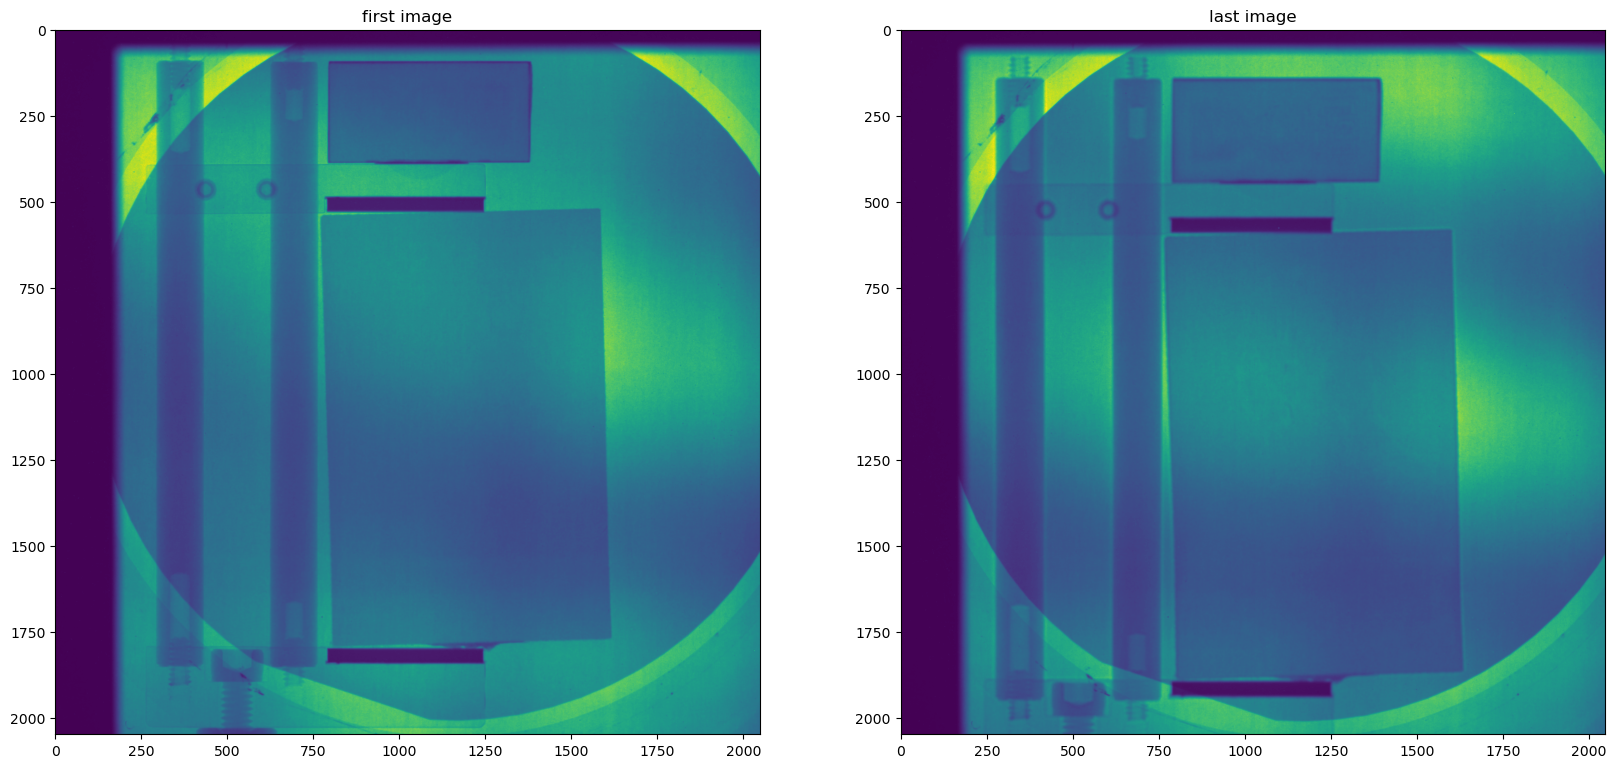

In [23]:
img1 = ski.io.imread(os.path.join(scan_dir, pos_file_list[0]))
img2 = ski.io.imread(os.path.join(scan_dir, pos_file_list[1]))
f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img1)
ax[0].set_title('first image')

ax[1].imshow(img2)
ax[1].set_title('last image')

# ax[2].imshow(img_min)
# ax[2].set_title('np.min')

Text(0.5, 1.0, 'last image')

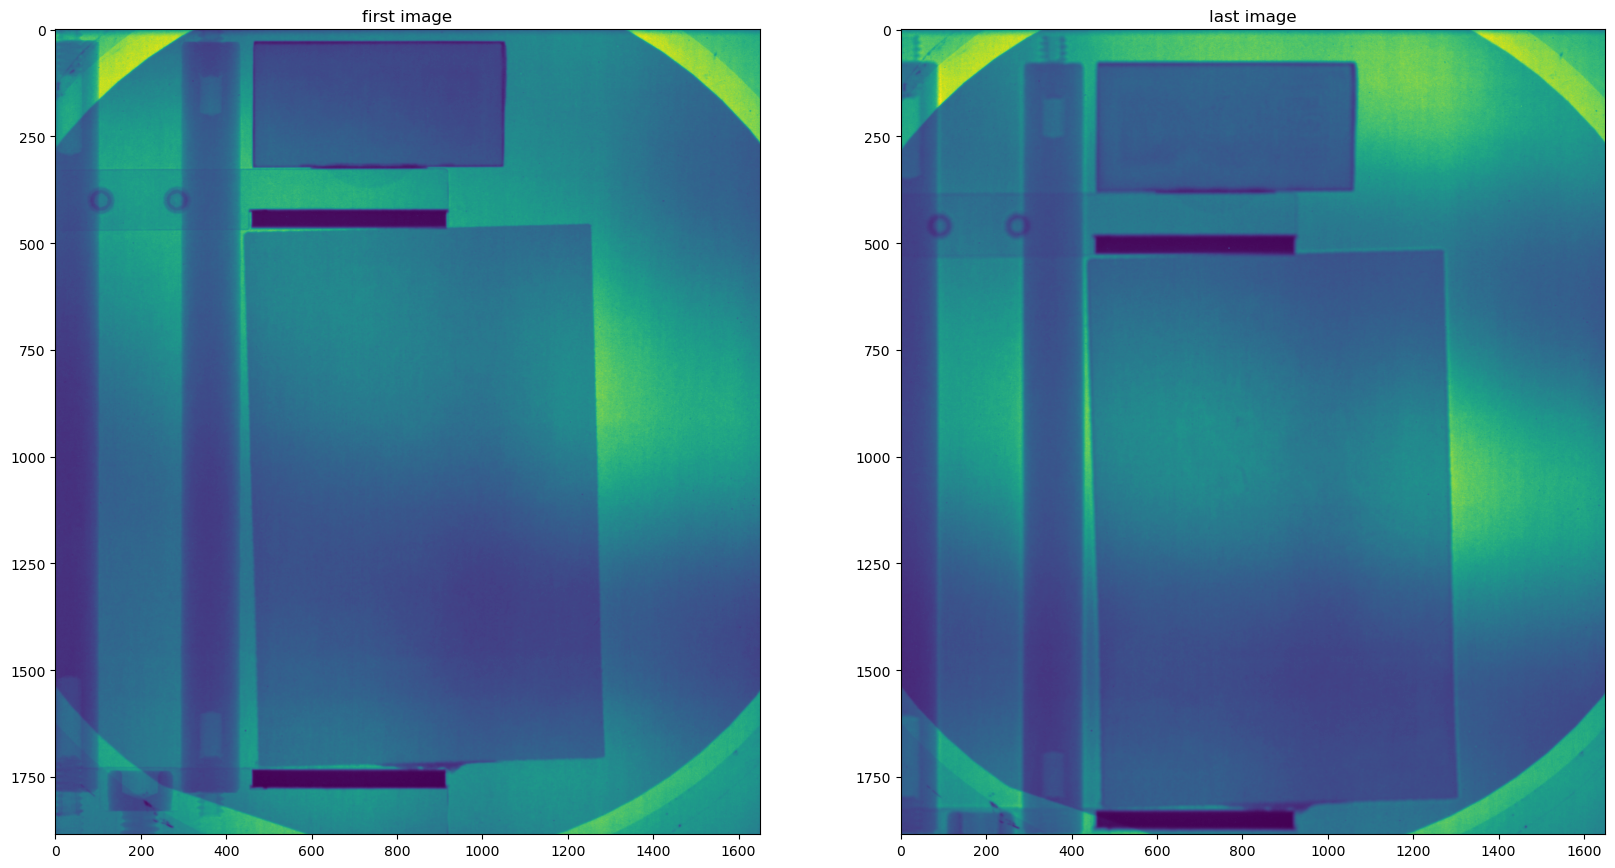

In [24]:
###################### need to change start
crop = True
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 330
crop_right = 1980
crop_top = 65
crop_bottom = 1950
###################### need to change end
img1_crop = rocku.crop(img1, crop_left, crop_right, crop_top, crop_bottom, crop)
img2_crop = rocku.crop(img2, crop_left, crop_right, crop_top, crop_bottom, crop)

f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img1_crop)
ax[0].set_title('first image')

ax[1].imshow(img2_crop)
ax[1].set_title('last image')

In [25]:
if len(file_list)%num_of_img == 0:
    first_file_list = file_list[0::num_of_img]
    if ob_name is None:
        for idx_1st, e_first in enumerate(first_file_list):
            if 'open' in e_first:
                ob_first_idx = idx_1st
        ob_first = first_file_list[ob_first_idx]
        first_file_list.pop(ob_first_idx)
    else:
        ob_first = ob_list[0]
#     ob_first = first_file_list[ob_first_idx]
#     first_file_list.pop(ob_first_idx)
    data_first = first_file_list[:]
    dc_first = dc_list[0]
    last_file_list = file_list[num_of_img-1::num_of_img]
    if ob_name is None:
        for idx_last, e_last in enumerate(last_file_list):
            if 'open' in e_last:
                ob_last_idx = idx_last
        ob_last = last_file_list[ob_last_idx]
        last_file_list.pop(ob_last_idx)
    else:
        ob_last = ob_list[-1]
    data_last = last_file_list[:]
    dc_last = dc_list[-1]
    df = pd.read_excel("/HFIR/CG1D/IPTS-26647/shared/notes_photos/nGI_multiACL_temp.xlsx", engine='openpyxl', nrows=0)
    info_dict = {}
    for i, e_col in enumerate(df.columns):
        info_dict[i] = []
    for idx, e_file in enumerate(data_first):
        info_dict[0].append(os.path.join(scan_dir, e_file)) # first_data_file
        info_dict[1].append(os.path.join(scan_dir, last_file_list[idx])) # last_data_file
        info_dict[2].append(os.path.join(ob_dir, ob_first)) # first_ob_file
        info_dict[3].append(os.path.join(ob_dir, ob_last)) # last_ob_file
        info_dict[4].append(os.path.join(dc_dir, dc_first)) # first_dc_file
        info_dict[5].append(os.path.join(dc_dir, dc_last)) # last_dc_file
        info_dict[6].append(1) # period
        info_dict[7].append(images_per_step) # images_per_step
        info_dict[8].append(0) # rotation
        info_dict[9].append('EM Fit') # fit_procedure
#         info_dict[10].append([0, 2047, 0, 2047]) # roi
        info_dict[10].append([crop_top, crop_bottom, crop_left, crop_right]) # roi
        info_dict[11].append('no') # gamma_filter_data_ob
        info_dict[12].append(35) # data_threshold_3x3
        info_dict[13].append(55) # data_threshold_5x5
        info_dict[14].append(80) # data_threshold_7x7
        info_dict[15].append(0.8) # data_sigma_log
        info_dict[16].append('no') # gamma_filter_dc
        info_dict[17].append(20) # dc_threshold_3x3
        info_dict[18].append(40) # dc_threshold_5x5
        info_dict[19].append(60) # dc_threshold_7x7
        info_dict[20].append(0.8) # dc_sigma_log
        info_dict[21].append('no') # dc_outlier_removal
        info_dict[22].append(1.5) # dc_outlier_value
        info_dict[23].append(out_dir) # result_directory
        info_dict[24].append('ACL_' + "{:03d}".format(int(e_file.split('_')[2]))) # file_id
#         info_dict[24].append('ACL_' + "{:03d}".format(int(e_file.split('_')[1]))) # file_id
        info_dict[25].append('') # sample_information
        info_dict[26].append('') # used_environment
        info_dict[27].append('') # osc_pixel
    for i, e_col in enumerate(df.columns):
        df[e_col] = info_dict[i]
    df.to_excel(xl_save_to, index=False, sheet_name='Tabelle1')
else:
    print("Need to clean/reorg files before continue.")